In [4]:
import pandas as pd
import numpy as np
import time
import ast
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [106]:
movies_metadata = pd.read_csv(
    '/Users/ankitkothari/Documents/gdrivre/UMD/MSML-602-DS/final_project/movies_metadata.csv'
)

print(movies_metadata.shape)

(45466, 24)


# About the Dataset

In [6]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# DATA CLEANING

## Dropping Columns

*  Column: Tagline
    * It has 25000 null values

* Column: Spoken Language 
    * We have the same information in the original language column
    
*  Column: Original_Title
    * We have the same information from the title column

*  Column: Status
    * All movies in the database are released movies
*  Column: Homepage, Poster_path, Adult, Belongs_to_collection, Video
    * Its not providing useful information so as ro be used as features

In [7]:
movies_features = movies_metadata.drop(columns=['poster_path','adult','homepage','tagline','belongs_to_collection','spoken_languages','original_title','video','status'])
movies_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   imdb_id               45449 non-null  object 
 4   original_language     45455 non-null  object 
 5   overview              44512 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_companies  45463 non-null  object 
 8   production_countries  45463 non-null  object 
 9   release_date          45379 non-null  object 
 10  revenue               45460 non-null  float64
 11  runtime               45203 non-null  float64
 12  title                 45460 non-null  object 
 13  vote_average          45460 non-null  float64
 14  vote_count            45460 non-null  float64
dtypes: float64(4), obje

### Checking for Null Values

In [8]:
movies_features.isnull().sum()

budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
overview                954
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
title                     6
vote_average              6
vote_count                6
dtype: int64

#### Looking into Runtime as it is deemed to be of high importance and contains null values

(-1.257, 125.6]     41306
(125.6, 251.2]       3719
(251.2, 376.8]        115
(376.8, 502.4]         34
(502.4, 628.0]         13
(628.0, 753.6]          5
(753.6, 879.2]          5
(879.2, 1004.8]         3
(1130.4, 1256.0]        3
(1004.8, 1130.4]        0
Name: runtime, dtype: int64


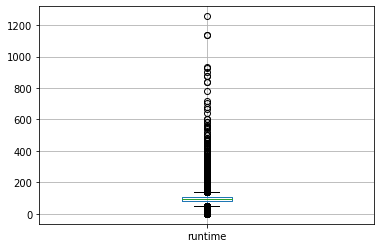

In [9]:
print(movies_features['runtime'].value_counts(bins=10))
ax = movies_features.boxplot(column=['runtime'])


### Identifying Bad Data

In [10]:
#data seems to be corrupt bad data 
movies_features[movies_features['revenue'].isnull()]

# 36000 rows with budget value is sting '0'
print('rows with budget value is string 0')
print(movies_features[movies_features['budget']=='0'].shape)

print('rows with revenue value is  0')
print(movies_features[movies_features['revenue']==0].shape)


rows with budget value is string 0
(36573, 15)
rows with revenue value is  0
(38052, 15)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

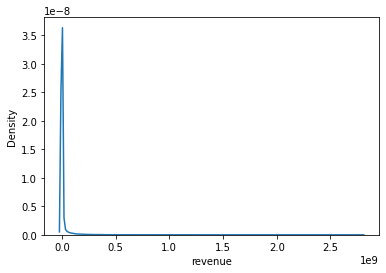

In [11]:
sns.kdeplot(data=movies_features, x="revenue")

In [12]:
movies_features.isnull().sum()

budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
overview                954
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
title                     6
vote_average              6
vote_count                6
dtype: int64

## Handling Bad and Missing Data

*  Dropping rows with null values revenue, original_language, budget and release_date
*  ImDb_ID could potentially be important thus filing the missing values with 0
*  Runtime deemed to be an important feature, the missing data was filled with median value

In [13]:
#dropping rows qith null values for imdb_id and original_language  and overview release_date
movies_features=movies_features.dropna(subset=['revenue','original_language','release_date','budget'])

#adding 0 here so that null values can be replaced and later IDs can be treated as integers and not string to save memory
movies_features['imdb_id']=movies_features['imdb_id'].fillna(value=0)

#imputing missing run_time values with median runtime. 
median_runtime = movies_features['runtime'].median()
movies_features['runtime']=movies_features['runtime'].fillna(value=median_runtime)
movies_features.isnull().sum()



budget                    0
genres                    0
id                        0
imdb_id                   0
original_language         0
overview                940
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
title                     0
vote_average              0
vote_count                0
dtype: int64

**Filtering rows to popularity values less than 20 as 99% of the movies have popularity scores less than 20**

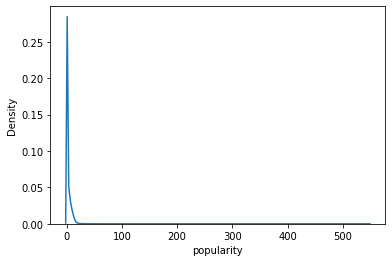

In [14]:
movies_features['popularity']=movies_features['popularity'].astype(float)
#movies_features.boxplot(column=['popularity'])
sns.kdeplot(data=movies_features, x="popularity")
movies_features['popularity'].quantile(0.99)
movies_features=movies_features[movies_features['popularity']<20]

# Feature Cleaning and Adding Features

*  **Converting Date to only Year**
*  **Converting imdb_id from string to numeric datatype**
*  **Converting Production_companies and genres columns to string and then extracting the relavant information**

In [15]:
movies_features['year'] = pd.to_datetime(movies_features['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

movies_features['imdb_id']=movies_features['imdb_id'].apply(lambda x: int(str(x).lstrip("tt")))

movies_features['production_companies']=movies_features['production_companies'].apply(lambda x: ast.literal_eval(x))
movies_features['production_companies']=movies_features['production_companies'].apply(lambda x: [i['name'] for i in x])

movies_features['genres']=movies_features['genres'].apply(lambda x: ast.literal_eval(x))
movies_features['genres']=movies_features['genres'].apply(lambda x: [i['name'] for i in x])

movies_features['production_countries']=movies_features['production_countries'].apply(lambda x: ast.literal_eval(x))
movies_features['production_countries']=movies_features['production_countries'].apply(lambda x: [i['name'] for i in x])
movies_features['production_countries'] = movies_features['production_countries'].apply(lambda x: x[0] if x !=[] else 0)

**Production_countries has bad data, to impute it we created a dictionary mapping language to country and since we have data for all languages used that dictionary to assign a country to the movie.**

In [16]:
movies_by_countries = movies_features.groupby(['production_countries']).count()['genres'].reset_index()
movies_by_countries=movies_by_countries.rename(columns={'genres':'number_of_movies'})
print(movies_by_countries.sort_values(by='number_of_movies', ascending=False).iloc[0:10])
movies_features['movies_by_countries'] = movies_features.groupby(['production_countries'])['genres'].transform(lambda x : x.count())

         production_countries  number_of_movies
138  United States of America             18246
0                           0              6208
136            United Kingdom              3040
48                     France              2693
26                     Canada              1489
65                      Japan              1489
63                      Italy              1465
50                    Germany              1410
109                    Russia               799
57                      India               781


In [17]:
movies_features[movies_features['production_countries']==0].groupby('original_language').count()['production_countries'].sort_values(ascending=False)[0:5]
language_country_mapping = movies_features.groupby(['original_language','production_countries']).size().reset_index().rename(columns={0:'count'})
language_country_mapping=language_country_mapping.sort_values(by='count',ascending=False).reset_index(drop=True)
language_country_mapping=language_country_mapping.drop_duplicates(subset=['original_language'],keep='first')
language_country_mapping.sort_values(by='count',ascending=False).reset_index(drop=True)
language_country_dict = {r[1]:r[2] for r in language_country_mapping.itertuples()}
print(language_country_dict)

{'en': 'United States of America', 'fr': 'France', 'ja': 'Japan', 'it': 'Italy', 'de': 'Germany', 'ru': 'Russia', 'hi': 'India', 'ko': 'South Korea', 'es': 'Spain', 'sv': 'Sweden', 'cn': 'Hong Kong', 'fi': 'Finland', 'pt': 'Brazil', 'zh': 'China', 'da': 'Denmark', 'pl': 'Poland', 'nl': 'Netherlands', 'cs': 'Czech Republic', 'tr': 'Turkey', 'no': 'Norway', 'fa': 'Iran', 'hu': 'Hungary', 'el': 'Greece', 'ta': 'India', 'th': 'Thailand', 'sr': 'Serbia', 'he': 'Israel', 'ro': 'Romania', 'te': 'India', 'ml': 'India', 'hr': 'Croatia', 'bn': 'India', 'tl': 'Philippines', 'et': 'Estonia', 'id': 'Indonesia', 'mr': 'India', 'is': 'Iceland', 'sl': 'Slovenia', 'ar': 'Egypt', 'ka': 'Georgia', 'lv': 'Latvia', 'xx': 'United States of America', 'bs': 'Bosnia and Herzegovina', 'ca': 'Spain', 'uk': 'Ukraine', 'bg': 'Bulgaria', 'vi': 'Vietnam', 'mk': 'Macedonia', 'sk': 'Slovakia', 'wo': 'Senegal', 'nb': 'Norway', 'ky': 'Kyrgyz Republic', 'lt': 'Lithuania', 'kk': 'Kazakhstan', 'ur': 'Pakistan', 'ab': 'Unit

In [18]:
empty_production_countries = movies_features["production_countries"] == 0
movies_features.loc[empty_production_countries,'production_countries']=movies_features.loc[empty_production_countries,'original_language'].map(language_country_dict)
movies_by_countries = movies_features.groupby(['production_countries']).count()['genres'].reset_index()
movies_by_countries=movies_by_countries.rename(columns={'genres':'number_of_movies'})
print(movies_by_countries.sort_values(by='number_of_movies', ascending=False).iloc[0:15])
movies_features['movies_by_countries'] = movies_features.groupby(['production_countries'])['genres'].transform(lambda x : x.count())

         production_countries  number_of_movies
138  United States of America             23410
136            United Kingdom              3040
48                     France              2840
63                      Italy              1701
65                      Japan              1523
50                    Germany              1491
26                     Canada              1489
57                      India               864
109                    Russia               858
121                     Spain               674
8                   Australia               496
54                  Hong Kong               477
119               South Korea               472
123                    Sweden               430
47                    Finland               386


#### Feature Filtering
We intend to provide latest recommendations and more well known movies worldwide. So we did the following:
*  Filtered movies_by_country to contain countries with 500 or more movies
*  Filtered movies by year to contain movies during or after 2000


In [19]:
movies_features=movies_features[movies_features['movies_by_countries']>500]
movies_features=movies_features[movies_features['genres']!='[]']
movies_features['year']=movies_features['year'].astype(float)
movies_features=movies_features[movies_features['year']>=2000]

In [20]:
movies_features.head()

,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,movies_by_countries
707,0,"[Drama, Foreign]",131232,333373,en,"Two Sicilian friends, Nunzio and Pino, share t...",0.003949,[],Italy,2002-03-20,0.0,86.0,Two Friends,0.0,0.0,2002.0,1701
868,0,"[Drama, Romance]",79782,1684935,en,An atmospheric coming-of-age story featuring a...,0.147130,[],United States of America,2010-05-25,0.0,110.0,Venice,7.5,4.0,2010.0,23410
1081,0,"[Comedy, Horror]",141210,2250194,en,"The town of Derry has a secret, but no one tol...",0.135596,[],United States of America,2013-10-12,0.0,6.0,The Sleepover,8.0,1.0,2013.0,23410
2114,0,[Drama],143750,2140519,en,"As her surroundings are invaded by outsiders, ...",0.211754,[],United States of America,2012-06-20,0.0,18.0,The Farmer's Wife,10.0,1.0,2012.0,23410
2564,0,[Documentary],84198,1736049,en,"Using personal stories, this powerful document...",0.501046,[],United States of America,2012-03-22,0.0,84.0,A Place at the Table,6.9,7.0,2012.0,23410


## Dropping Irrelavant Features
After Exploartory Data Analysis we dropped all irrelavant features for algorithm such as id,imdb_id,title,overview,production_companies,revenue,budget,movies_by_countries,release date, original_language

In [21]:
movies_features=movies_features.reset_index(drop=True)
movies_kmeans= movies_features.drop(columns=['title','id','imdb_id','imdb_id','overview','production_companies','revenue','budget','movies_by_countries','release_date','original_language'])

In [22]:
movies_kmeans_copy = movies_kmeans.copy()
movies_kmeans.head()

,genres,popularity,production_countries,runtime,vote_average,vote_count,year
0,"[Drama, Foreign]",0.003949,Italy,86.0,0.0,0.0,2002.0
1,"[Drama, Romance]",0.147130,United States of America,110.0,7.5,4.0,2010.0
2,"[Comedy, Horror]",0.135596,United States of America,6.0,8.0,1.0,2013.0
3,[Drama],0.211754,United States of America,18.0,10.0,1.0,2012.0
4,[Documentary],0.501046,United States of America,84.0,6.9,7.0,2012.0


## Scaling and Normalizing The Data

In [23]:
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset

In [24]:
movies_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                18898 non-null  object 
 1   popularity            18898 non-null  float64
 2   production_countries  18898 non-null  object 
 3   runtime               18898 non-null  float64
 4   vote_average          18898 non-null  float64
 5   vote_count            18898 non-null  float64
 6   year                  18898 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.0+ MB


In [25]:
scaled_data = normalize(movies_kmeans)

In [26]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                18898 non-null  object 
 1   popularity            18898 non-null  float64
 2   production_countries  18898 non-null  object 
 3   runtime               18898 non-null  float64
 4   vote_average          18898 non-null  float64
 5   vote_count            18898 non-null  float64
 6   year                  18898 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.0+ MB


### One Hot Encoding
Genre and Production_Countries contains lists so they are exploded and one hot encoded for easier manipulation and clustering

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)


df = scaled_data.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(scaled_data.pop('genres')),
                index=scaled_data.index,
                columns=mlb.classes_))


In [28]:
df.head()

,popularity,production_countries,runtime,vote_average,vote_count,year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.000139,Italy,0.075439,0.00,0.000000,0.10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.007319,United States of America,0.096491,0.75,0.000388,0.50,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006740,United States of America,0.005263,0.80,0.000097,0.65,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.010559,United States of America,0.015789,1.00,0.000097,0.60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.025065,United States of America,0.073684,0.69,0.000680,0.60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
mlb = MultiLabelBinarizer(sparse_output=True)

df['production_countries']=df['production_countries'].apply(lambda x: [x])
df1 = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('production_countries')),
                index=df.index,
                columns=mlb.classes_))


In [30]:
df1.shape

(18898, 35)

In [31]:
df1.head()

,popularity,runtime,vote_average,vote_count,year,Action,Adventure,Animation,Comedy,Crime,...,Canada,France,Germany,India,Italy,Japan,Russia,Spain,United Kingdom,United States of America
0,0.000139,0.075439,0.00,0.000000,0.10,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.007319,0.096491,0.75,0.000388,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.006740,0.005263,0.80,0.000097,0.65,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.010559,0.015789,1.00,0.000097,0.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.025065,0.073684,0.69,0.000680,0.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# K-Means Clustering
**Our aim is to provide recommendations based on similarity of a movie choice the problem turned to be one of Unsupervised learning**
*  We needed to use similarity to group movies thus we decided on K-Means Clustering
*  Used Elbow method to find ideal number of clusters which turned out to be 40
*  Used silhouette Method to understand the quality of segregation of the clusters

In [32]:
from sklearn.cluster import KMeans
data_ml=df1.values
kinitial = [3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99]
inertia = []
scoree = []
for k in kinitial:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_ml)
    y_pred=kmeans.predict(data_ml)
    inertia.append(kmeans.inertia_)
    scoree.append(metrics.silhouette_score(data_ml, y_pred))

## Cluster Analysis

### Elbow Method

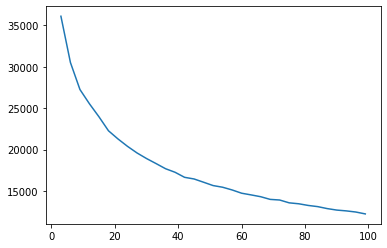

In [33]:
plt.plot(kinitial,inertia)

### Silhouette Score

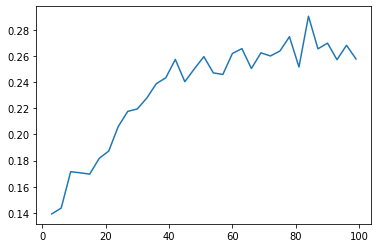

In [34]:
plt.plot(kinitial,scoree)

In [35]:
from sklearn.cluster import KMeans
data_ml=df1.values
kinitial = [40]
inertia = []
scoree = []
for k in kinitial:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_ml)
    y_pred=kmeans.predict(data_ml)
    inertia.append(kmeans.inertia_)
    scoree.append(metrics.silhouette_score(data_ml, y_pred))

In [36]:
movies_features['label']=y_pred
df1['label']=y_pred


### Principal Component Analysis (PCA) Analysis

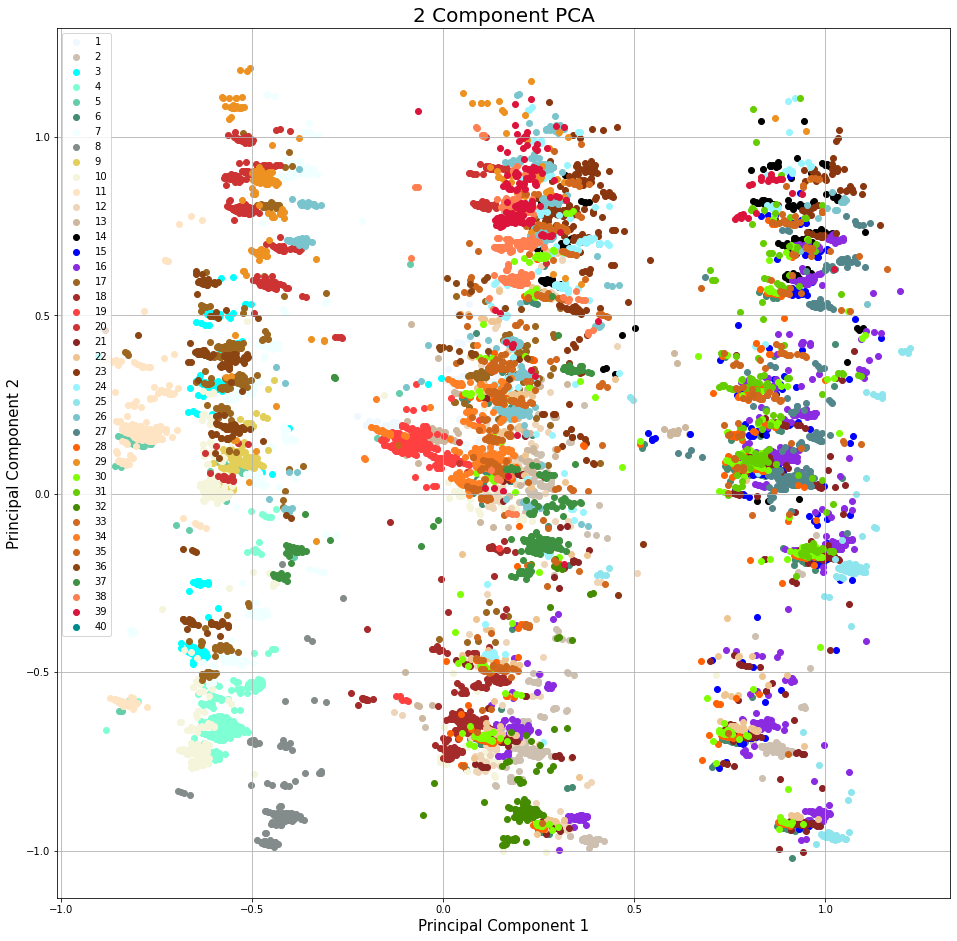

In [242]:
pca_df = pd.read_csv('/Users/ankitkothari/Documents/gdrivre/UMD/MSML-602-DS/final_project/pca_file.csv',index_col=[0])
x = pca_df.iloc[:, :-1]
y = pca_df.loc[:,['label']].values

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_df[['label']]], axis = 1)
finalDf.head(5)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [i for i in range(1,41)]
colors = ['#F0F8FF', '#CDC0B0', '#00FFFF','#7FFFD4','#66CDAA','#458B74','#F0FFFF','#838B8B','#E3CF57','#F5F5DC','#FFE4C4','#EED5B7','#CDB79E','#000000','#0000FF','#8A2BE2','#9C661F','#A52A2A','#FF4040','#CD3333','#8B2323','#EEC591','#8A360F','#98F5FF','#8EE5EE','#7AC5CD','#53868B','#FF6103','#ED9121','#7FFF00','#66CD00','#458B00','#D2691E','#FF7F24','#CD661D','#8B4513','#3D9140','#FF7F50','#DC143C','#008B8B']
#targets = [i for i in range(1,5)]
#colors = ['#458B74', '#CDC0B0', '#00FFFF','#7FFFD4']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [37]:
df1.head()

,popularity,runtime,vote_average,vote_count,year,Action,Adventure,Animation,Comedy,Crime,...,France,Germany,India,Italy,Japan,Russia,Spain,United Kingdom,United States of America,label
0,0.000139,0.075439,0.00,0.000000,0.10,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
1,0.007319,0.096491,0.75,0.000388,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,37
2,0.006740,0.005263,0.80,0.000097,0.65,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
3,0.010559,0.015789,1.00,0.000097,0.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.025065,0.073684,0.69,0.000680,0.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,11


In [38]:
movies_features.query("label==3")

,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,movies_by_countries,label
2,0,"[Comedy, Horror]",141210,2250194,en,"The town of Derry has a secret, but no one tol...",0.135596,[],United States of America,2013-10-12,0.0,6.0,The Sleepover,8.0,1.0,2013.0,23410,3
14,40000000,"[Horror, Mystery]",4234,134084,en,"A murdering spree begins to happen again, this...",9.738371,"[Konrad Pictures, Craven-Maddalena Films, Dime...",United States of America,2000-02-03,161834276.0,116.0,Scream 3,5.7,749.0,2000.0,23410,3
38,23000000,[Horror],9532,195714,en,After a teenager has a terrifying vision of hi...,14.961416,"[New Line Cinema, Zide-Perry Productions, Hard...",United States of America,2000-03-16,53302314.0,98.0,Final Destination,6.4,1416.0,2000.0,23410,3
353,1500000,"[Horror, Mystery]",10972,261983,en,Tensions rise within an asbestos cleaning crew...,14.242234,"[October Films, USA Films, Scout Productions]",United States of America,2001-08-10,373967.0,100.0,Session 9,6.2,255.0,2001.0,23410,3
505,0,[Horror],44340,275067,en,George is a high-strung professional photograp...,0.910772,[Glass Eye Pix],United States of America,2001-01-23,0.0,91.0,Wendigo,5.0,22.0,2001.0,23410,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,2000,"[Animation, Horror]",52803,1305751,en,A voodoo doll must find the courage to save hi...,0.942521,[UCLA School of Film and Television],United States of America,2008-06-07,0.0,4.0,Sebastian's Voodoo,6.8,18.0,2008.0,23410,3
18762,0,"[Animation, Horror, Drama]",366071,2279314,en,A priest is recruited by federal marshals to h...,0.016824,[],United States of America,2012-10-12,0.0,81.0,Enchiridion,0.0,0.0,2012.0,23410,3
18779,0,[Horror],415633,5161376,en,"After a girl goes missing, two of her friends ...",1.136537,"[Lamplight Films, Twenty Eighteen Seventy-Six]",United States of America,2016-10-09,0.0,84.0,Tonight She Comes,5.3,14.0,2016.0,23410,3
18894,0,"[Mystery, Horror]",390959,265736,en,"In this true-crime documentary, we delve into ...",0.076061,[],United States of America,2000-10-22,0.0,45.0,Shadow of the Blair Witch,7.0,2.0,2000.0,23410,3


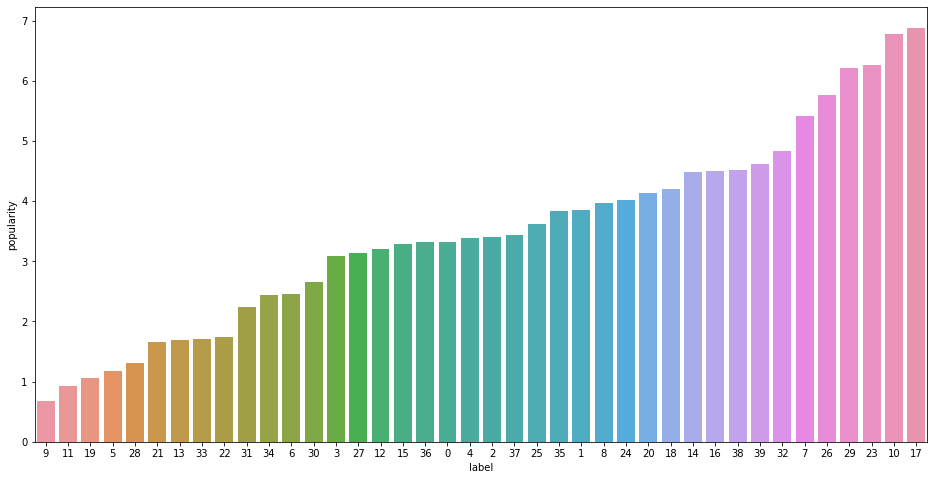

In [57]:
popularity_graph = movies_features.groupby('label').mean()['popularity'].sort_values().reset_index()
popularity_graph['label']=popularity_graph['label'].astype(str)
popularity_graph.head()
ax = plt.figure(figsize=(16,8))
ax = sns.barplot(x="label", y="popularity", data=popularity_graph.sort_values(by=['popularity']))
plt.show()

# Recommandations

*  We needed to identify the cluster for the Input Movie
*  Withing that cluster identify the movies which are the closest match using cosine similarity
*  Provide a list of top 15 movies as recommeendation

## Movie Check

In [233]:
movie_name='Final Destination'   #Betrayal #Two Friends
def movie_check(movie_name):
  if movie_name not in movies_features['title'].to_list():
     print('Movie Does not Exist in the database')
  else:
     print('Movie Found')

movie_check(movie_name)       

Movie Found


In [234]:
movie_name_index = movies_features[movies_features['title']==movie_name].index
print(movie_name_index)
movie_label = movies_features[movies_features['title']==movie_name]['label']
print(movie_label)
movies_cluster = movies_features[movies_features['label']==movie_label.iloc[0]]
movies_cluster.head()
movies_cluster_scaled = df1[df1['label']==movie_label.iloc[0]]
#movies_cluster_scaled


Int64Index([38], dtype='int64')
38    3
Name: label, dtype: int32


In [235]:
index_value= movies_features[movies_features['title']==movie_name].index
print(index_value[0])
movies_cluster_scaled[movies_cluster_scaled.index==index_value[0]]

38


,popularity,runtime,vote_average,vote_count,year,Action,Adventure,Animation,Comedy,Crime,...,France,Germany,India,Italy,Japan,Russia,Spain,United Kingdom,United States of America,label
38,0.750159,0.085965,0.64,0.137516,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3


In [236]:
#SKLEARN
name = movies_cluster_scaled[movies_cluster_scaled.index==index_value[0]].iloc[:,0:-1].values
name = np.asarray(name)
name = name.reshape(1,-1)
cluster_vallues = movies_cluster_scaled.iloc[:,0:-1].values
cluster_vallues.shape

(515, 35)

In [237]:
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
cosine_value_tf = 1- pairwise_distances(cluster_vallues, name, metric = 'cosine' )
cosine_value_tf
s = pd.DataFrame(cosine_value_tf)
s=s.rename(columns={0:'similarity_index'})
movies_cluster['similarity_index']=s['similarity_index']
movies_cluster.sort_values(by='similarity_index',ascending=False)['title'].iloc[1:15].reset_index(drop=True)


0                         Wendigo
1                        Scream 3
2               Final Destination
3                       Session 9
4                   The Mesmerist
5             Final Destination 2
6                         Willard
7           House of 1000 Corpses
8                     Cabin Fever
9     The Texas Chainsaw Massacre
10                      Dark Wolf
11               Da Hip Hop Witch
12                     Club Dread
13               Dawn of the Dead
Name: title, dtype: object

In [239]:
movies_features.to_csv('/Users/ankitkothari/Documents/gdrivre/UMD/MSML-602-DS/final_project/movies_metadata_features.csv')

# Bibliography